# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. **By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.**


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange.**They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.**

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
%matplotlib inline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Loading the dataset stock_data.csv
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")  # f-string


There are 340 rows and 15 columns in the dataset.


<IPython.core.display.Javascript object>

**Observations:**
* The dataset has 340 rows and 15 columns

In [4]:
# Viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000,-15.478,2.924,205,70,830000000,-14454000000,-35.550,406582278.500,93.089,1.786
125,FB,Facebook,Information Technology,Internet Software & Services,104.660,16.224,1.321,8,958,592000000,3669000000,1.310,2800763359.000,79.893,5.884
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.030,7.579,1.163,15,47,21818000,248710000,1.520,163625000.000,26.336,-1.269
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410,10.661,0.806,17,129,160383000,636056000,3.280,491391569.000,24.070,-2.257
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610,0.865,1.590,32,64,-588000000,-7829000000,-10.230,765298142.700,93.089,3.345
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130,-21.254,2.365,2,201,523803000,85171000,0.560,152091071.400,93.089,9.568
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040,-5.102,1.966,4,189,7786000000,-671000000,-0.790,849367088.600,93.089,17.346
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.620,3.654,1.160,20,99,2288000000,2297000000,5.140,446887159.500,10.432,-0.376
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480,7.067,1.581,12,67,412000000,968100000,2.260,428362831.900,14.814,4.219


<IPython.core.display.Javascript object>

In [5]:
# Making a copy of the dataset to another variable(df) to avoid
# any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

**Fixing column names**

In [6]:
# Replacing any space(" ") between words in a any column name with "_"
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [7]:
# Checking the data types,number of non-null values and names of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

**Observations:**
* There are 4 object data type variables.**'Ticker_Symbol', 'Security', 'GICS_Sector', 'GICS_Sub_Industry'** are object data type variables.
* The rest of(that is 11) the variables are numerical data type variables.
  **'Current_Price', 'Price_Change', 'Volatility','Earnings_Per_Share', 'Estimated_Shares_Outstanding', 'P/E_Ratio'and 'P/B_Ratio'** are float data type variables.**'ROE', 'Cash_Ratio','Net_Cash_Flow',and 'Net_Income'** are integer(int) data type variables.

In [8]:
# Converting object data type columns to categorical data type columns
# inorder to reduce memory usage.
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype == "object":  # Only apply for columns with categorical strings
        df[feature] = df[feature].astype(
            "category"
        )  # replace object data type into category data type

# Checking the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker_Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS_Sector                   340 non-null    category
 3   GICS_Sub_Industry             340 non-null    category
 4   Current_Price                 340 non-null    float64 
 5   Price_Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash_Ratio                    340 non-null    int64   
 9   Net_Cash_Flow                 340 non-null    int64   
 10  Net_Income                    340 non-null    int64   
 11  Earnings_Per_Share            340 non-null    float64 
 12  Estimated_Shares_Outstanding  340 non-null    floa

<IPython.core.display.Javascript object>

**Observations:**
* Converting **Ticker_Symbol, Company, GICS_Sector, GICS_Sub_Industry columns** from object data type to category data type resulted to a reduced memory usage from 40.0+ KB to 58.1 KB.

In [9]:
# Checking for missing values
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* There are no missing values in the dataset.

In [10]:
# Checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observations:**
* There are no duplicated entries in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

#### Statistical Summary Of The Data

In [11]:
# Returns the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,3M Company,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.000,NaN,NaN,NaN,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price_Change,340.000,NaN,NaN,NaN,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,NaN,NaN,NaN,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,NaN,NaN,NaN,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash_Ratio,340.000,NaN,NaN,NaN,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net_Cash_Flow,340.000,NaN,NaN,NaN,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000


<IPython.core.display.Javascript object>

**Observations:**
* There is a large difference between the 3rd quartile and the maximum value of most of numerical variables indicating there might be outliers in such variables.
* The current stock price of companies in this dataset ranges from 4.5dollars to 1274.95dollars.The average current stock price is ~80.9dollars.
* The cash ratio of companies in this dataset ranges from 0 to 958.The average cash ratio is 70.024.
* P/E Ratio(Ratio of companies' current stock price to their earnings per share) in this dataset ranges from 2.935 to 528.039.The average P/E Ratio is 32.613.
* P/B Ratio(Ratio of companies' stock price per share by their book value per share) in this dataset ranges from -76.119 to 129.065.The average P/B Ratio is -1.718.
* The average estimated shares Outstanding is 577028337.754.
* The average net cash flow of companies in this dataset is ~55537620.6	 dollars. 
* The average net income is 1494384602.941 dollars.
* The average earnings per share is ~2.7dollars.
* The 340 rows indicates 340 unique companies assigned to 11 different specific economic sectors.**There are more companies in this dataset that belong to the industrial economic sector.**
* The 340 companies in this dataset are assigned to 104 different specific sub-industrial groups.There are **more** companies in this dataset that belong to the **Oil & Gas Exploration & Production** sub-industrial groups.	

**Ticker_Symbol won't be required for analysis as it just an identifier,so this column will be dropped**

In [12]:
# Dropping "Ticker_Symbol" column from the dataframe df
df.drop("Ticker_Symbol", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="autumn"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="dashed"
    )  # Add mean to the histogram (broken green line)
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram (red line)

<IPython.core.display.Javascript object>

**Q.1. What does the distribution of stock prices look like?**

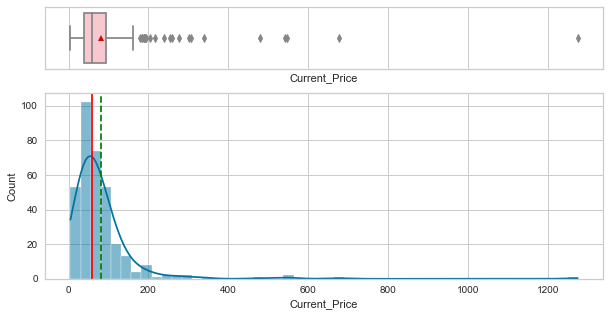

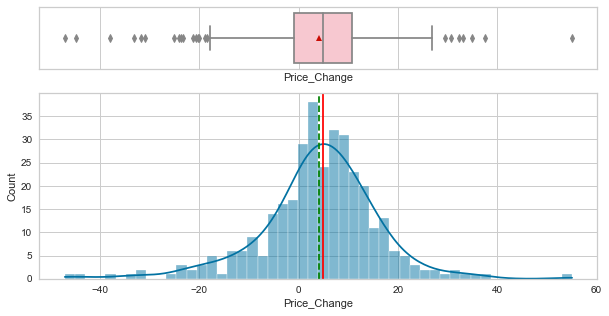

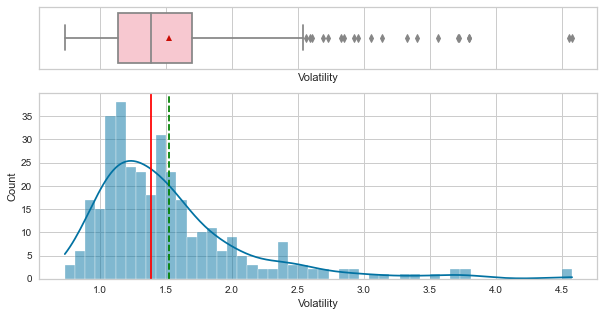

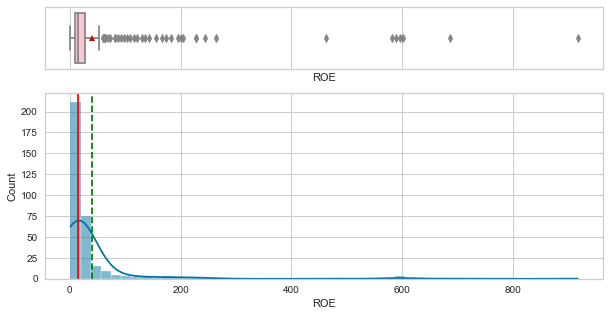

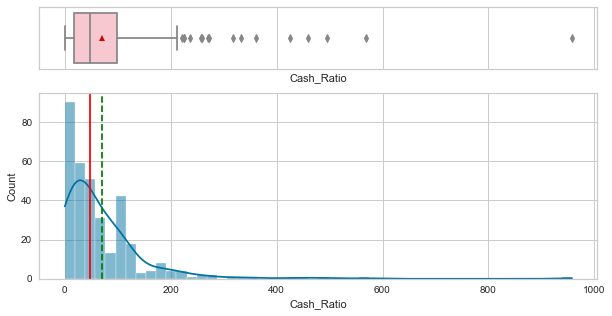

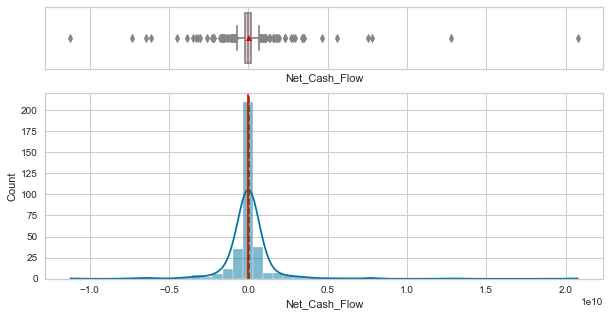

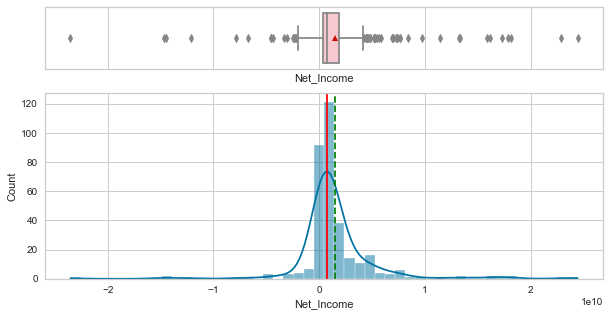

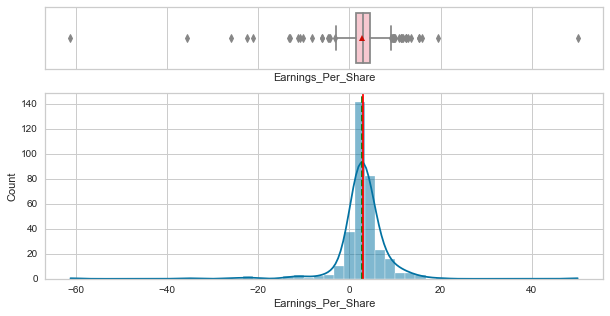

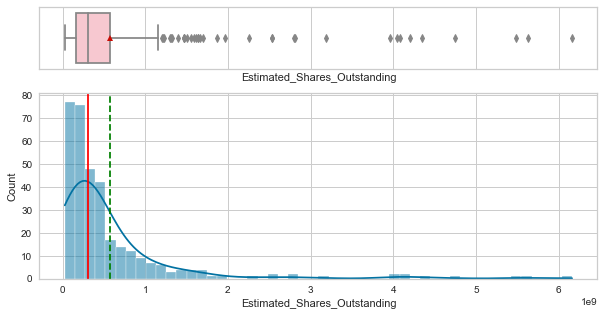

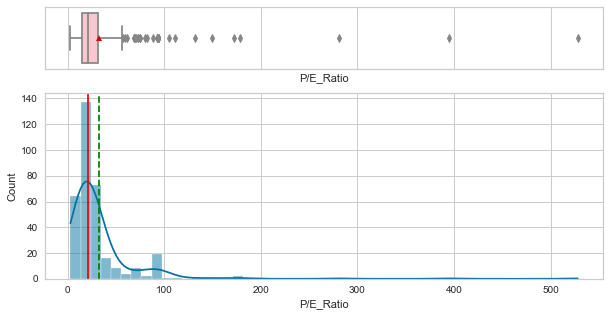

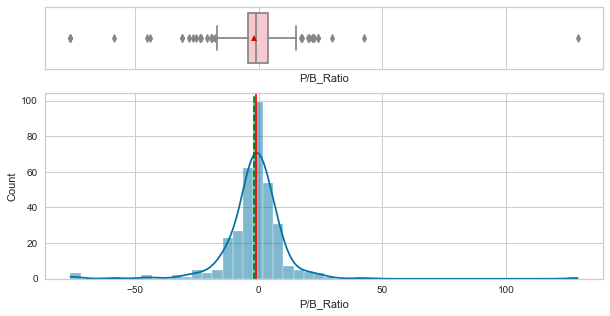

<IPython.core.display.Javascript object>

In [14]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Creating a boxplot and histogram for all numerical variables the data
for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

**Observations:**

**`Current Price`:**
* **The distribution of current stock price variable is right-skewed.**
* **There are outliers towards the right.**
* The median current stock price is ~60dollars.
* There are companies in this dataset with stock prices above 1200dollars.

**`Price_Change`:**
* The distribution of Price_Change variable is close to normal.
* There are outliers on both ends of the boxplot of the Price_Change variable.

**`Volatility`:**
* The distribution of Volatility is right-skewed.
* There are outliers towards the right.
* Most companies' volatility (standard deviation of the stock price) are at the lower end that is less than 2 but we notice observations of standard deviation of stock price  above 4.

**`ROE`:**
* The distribution of ROE variable is highly right skewed.
* There are outliers towards the right.

**`Cash_Ratio`:**
* The distribution of Cash_Ratio variable is right skewed.
* There are outliers towards the right.

**`Net_Cash_Flow`:**
* The distribution of Net_Cash_Flow variable is  close to normal.
* There are outliers on both ends of the box plot of the Net_Cash_Flow variable.

**`Net_Income`:**
* The distribution of Net_Income variable is close to normal.
* There are outliers on both ends of the box plot of the Net_Income variable.

**`Earnings_Per_Share`:**
* The distribution of Earnings_Per_Share variable is close to normal.The median and the mean values are very close.
* There are outliers on both ends of the boxplot.

**`Estimated_Shares_Outstanding`:**
* The distribution of Estimated_Shares_Outstanding variable is right-skewed.This indicates that most companies' stock held by all the stakeholders are at the lower end.
* There are outliers towards the right.

**`P/E_Ratio`:**
* The distribution of P/E_Ratio variable is right-skewed.
* There are outliers towards the right.

**`P/B_Ratio`:**
* The distribution of P/B_Ratio variable is close to normal.The median and mean values are very close.
* There are outliers on both ends of the boxplot.

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="tab10",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

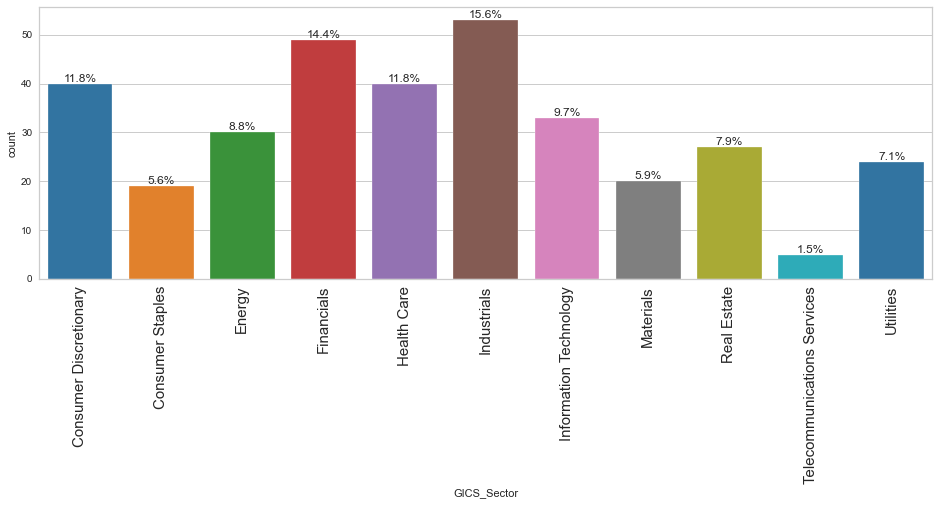

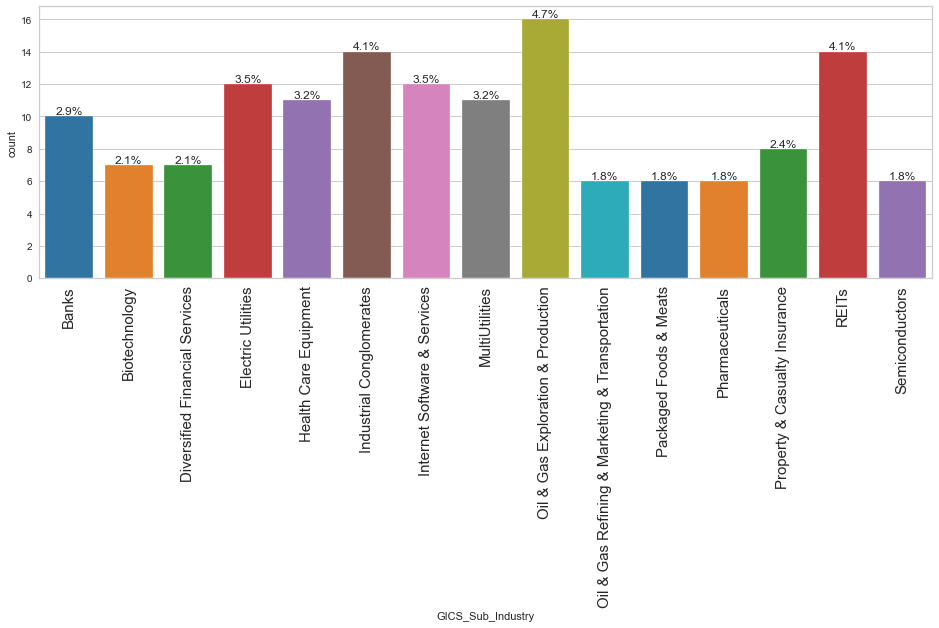

<IPython.core.display.Javascript object>

In [16]:
# Selecting categorical columns and storing it in the variable cat_cols
cat_cols = df.select_dtypes(include="category").columns.tolist()

# Removing the column "Company"
cat_cols.remove("Security")

# Creating a labeled barplot for all categorical variables of the data
for item in cat_cols:
    labeled_barplot(df, item, perc=True, n=15)

In [17]:
# Printing number of count of each unique value in GICS_Sub_Industry column
df["GICS_Sub_Industry"].value_counts(normalize=True)

Oil & Gas Exploration & Production                0.047
REITs                                             0.041
Industrial Conglomerates                          0.041
Internet Software & Services                      0.035
Electric Utilities                                0.035
MultiUtilities                                    0.032
Health Care Equipment                             0.032
Banks                                             0.029
Property & Casualty Insurance                     0.024
Diversified Financial Services                    0.021
Biotechnology                                     0.021
Pharmaceuticals                                   0.018
Semiconductors                                    0.018
Packaged Foods & Meats                            0.018
Oil & Gas Refining & Marketing & Transportation   0.018
Diversified Chemicals                             0.015
Consumer Finance                                  0.015
Industrial Machinery                            

<IPython.core.display.Javascript object>

**Observations:**

**`GICS_Sector`:**
* There are 11 different economic sectors are assigned to companies in this dataset.
* **15.6%(which represent the majority) of companies in this dataset belong to the industrial economic sector,**14.4%** of companies belong to the Financial economic sector,**11.8%** of companies belong to the Healthcare economic sector
  **11.8%** of companies belong to the Consumer Discretionary economic sector    ,and 9.7% belong to the information technology economic sector.
 * Only **1.5%**  of companies belong to the Telecommunications Services economic sector.
 
**`GICS_Sub_Industry`:**
* There are 104 different specific sub-industry group in this dataset to which the companies are assigned to.
* **4.7%(which represent the majority) of companies in this dataset are assigned to the sub-industry group-Oil & Gas Exploration & Production**, **4.1%** of companies  are assigned to the sub-industry group-REITs
  and **4.1%** of companies are assigned to the sub-industry group-Industrial Conglomerates.

### Bivariate Analysis

**Q.3.How are the different variables correlated with each other?**

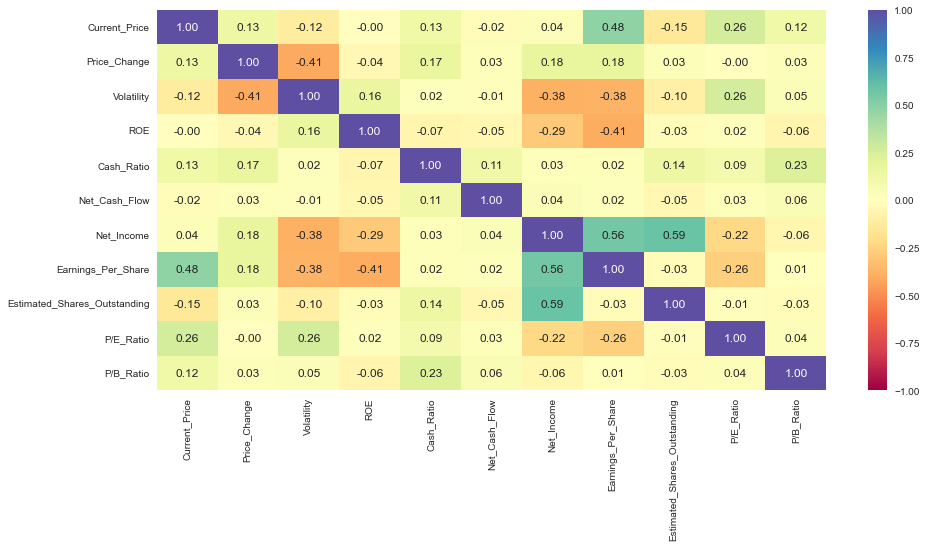

<IPython.core.display.Javascript object>

In [18]:
# Checking for Correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* Net_Income shows an average positive correlation with Earnings_Per_Share and Estimated_Shares_Outstanding.
* Earnings_Per_Share shows an average positive correlation with Current_Price.
* Price_Change shows an average negative correlation with Volatility 
* Earnings_Per_Share shows an average negative correlation with ROE.

**Q.2.The stocks of which economic sector have seen the maximum price increase on average?**

#####  GICS_Sector vs Current_Price

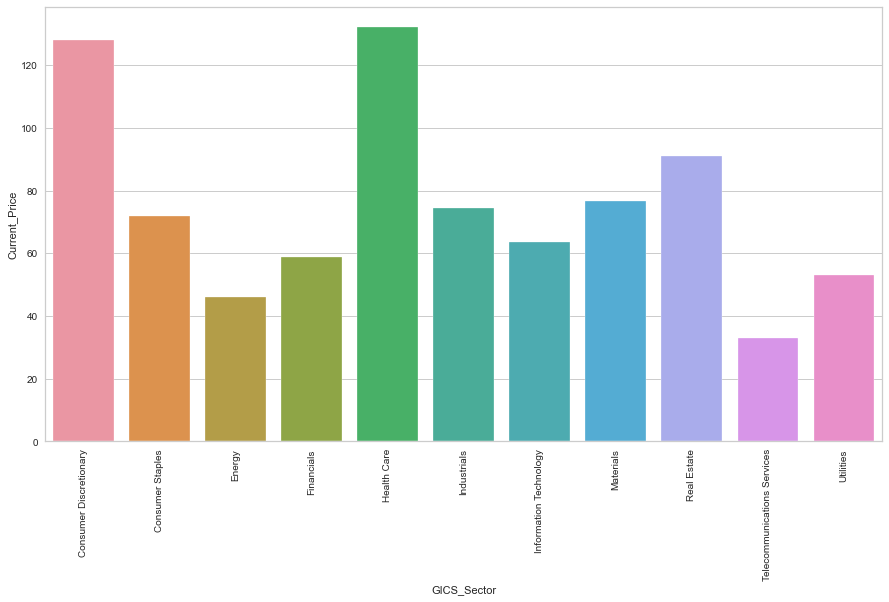

<IPython.core.display.Javascript object>

In [19]:
# Plotting a barplot of GICS_Sector vs Current_Price
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Current_Price", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("Current_Price")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The stocks of the **Healthcare** economic sector **have shown the maximum average price** followed by the **Consumer Discretionary** and the **Real Estate** economic sectors.
* On the otherhand,the stocks of the **Telecommunications Services** economic sector have shown  the lowest average price. 

**Q.4.Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

#####  GICS_Sector vs Cash_Ratio

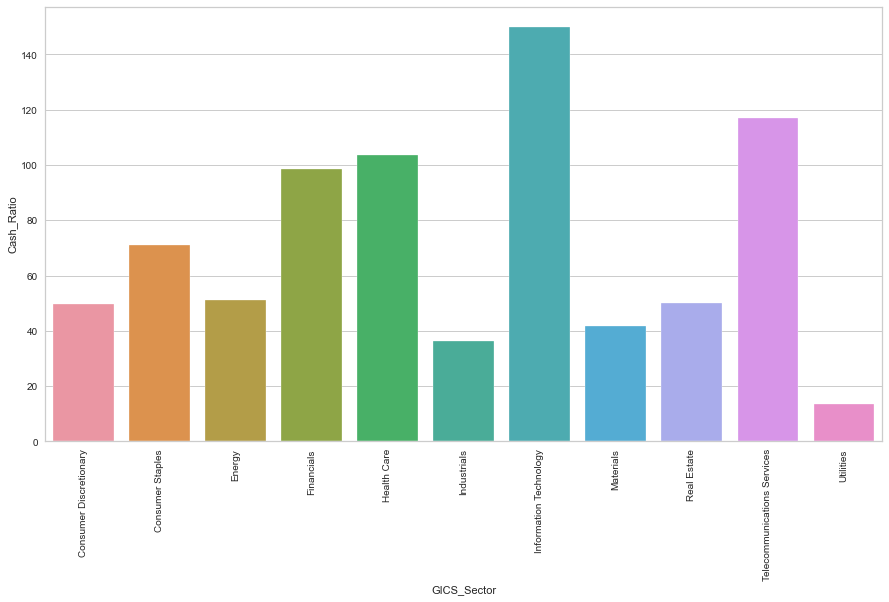

<IPython.core.display.Javascript object>

In [20]:
# Plotting a barplot of GICS_Sector vs Cash_Ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Cash_Ratio", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("Cash_Ratio")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The economic sector **Information technology** has the **highest average cash ratio followed by** the economic sectors **Telecommunications services and Healthcare.**
* On the otherhand,the economic sector **Utilities** have the **lowest average cash ratio.**

**Q.5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

#####  GICS_Sector vs P/E_Ratio

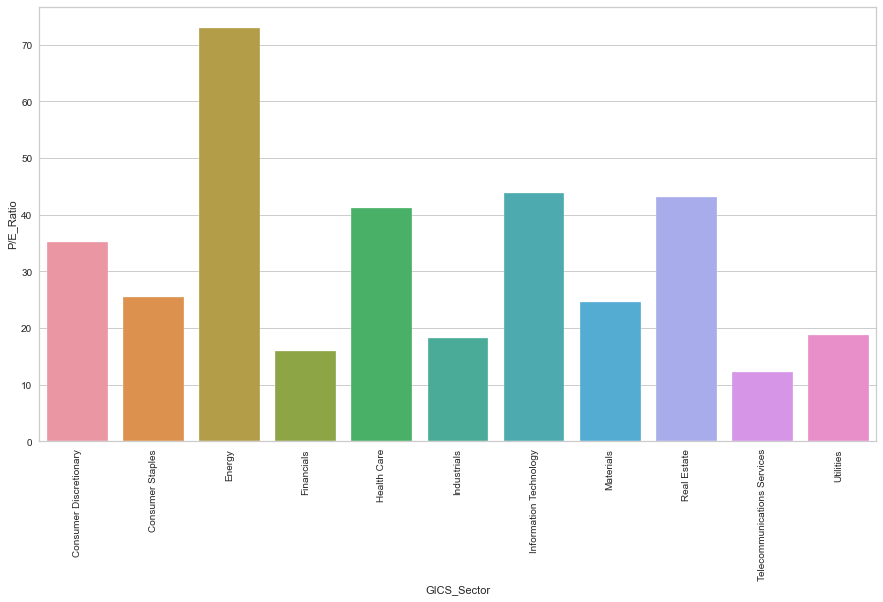

<IPython.core.display.Javascript object>

In [21]:
# Plotting a barplot of GICS_Sector vs P/E_Ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="P/E_Ratio", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("P/E_Ratio")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Checking the mean P/E ratio  across economic sectors in descending order
df.groupby("GICS_Sector")["P/E_Ratio"].mean().sort_values(ascending=False)

GICS_Sector
Energy                        72.898
Information Technology        43.783
Real Estate                   43.066
Health Care                   41.135
Consumer Discretionary        35.212
Consumer Staples              25.521
Materials                     24.585
Utilities                     18.719
Industrials                   18.259
Financials                    16.023
Telecommunications Services   12.223
Name: P/E_Ratio, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
* The economic sector with the highest average P/E ratio is the **Energy** sector followed by the **Information Technology and Real Estate** economic sectors.
* The **Telecommunications Services** economic sector has the **lowest average P/E ratio**.

#####  GICS_Sector vs P/B_Ratio

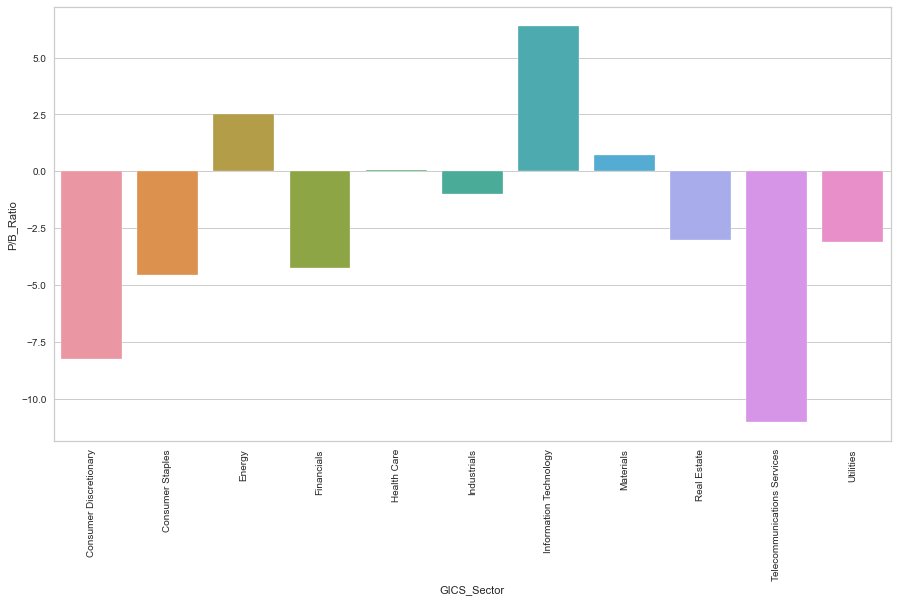

<IPython.core.display.Javascript object>

In [23]:
# Plotting a barplot of GICS_Sector vs P/B_Ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="P/B_Ratio", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("P/B_Ratio")
plt.xticks(rotation=90)
plt.show()

In [24]:
# Checking the mean P/E ratio  across economic sectors in descending order
df.groupby("GICS_Sector")["P/B_Ratio"].mean().sort_values(ascending=False)

GICS_Sector
Information Technology          6.377
Energy                          2.540
Materials                       0.723
Health Care                     0.069
Industrials                    -0.979
Real Estate                    -3.003
Utilities                      -3.087
Financials                     -4.271
Consumer Staples               -4.554
Consumer Discretionary         -8.254
Telecommunications Services   -11.010
Name: P/B_Ratio, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
* **Information Technology** economic sector has the highest average P/B Ratio.
* **Telecommunications Services** economic sector has the lowest average P/B Ratio.

#####  GICS_Sector vs Estimated_Shares_Outstanding

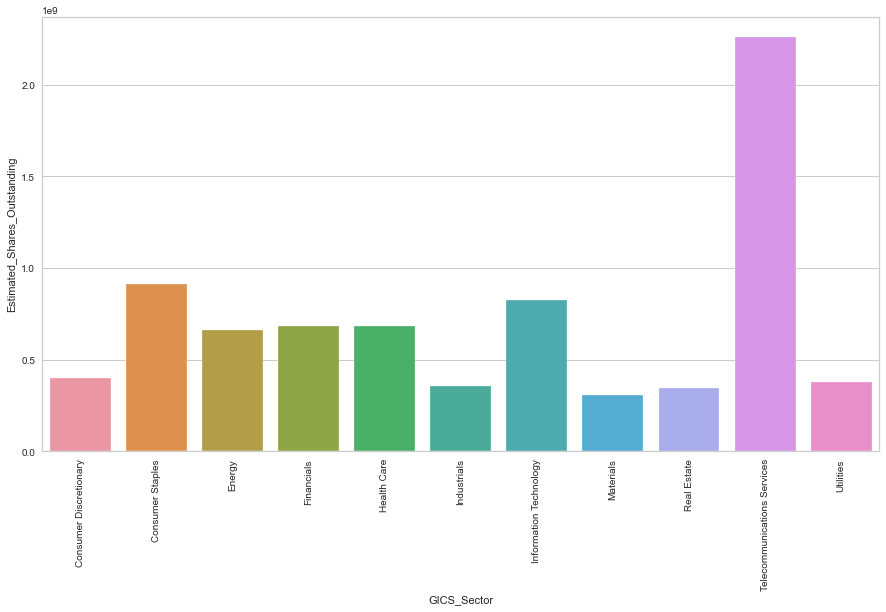

<IPython.core.display.Javascript object>

In [25]:
# Plotting a barplot of GICS_Sector vs P/E_Ratio
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Estimated_Shares_Outstanding", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("Estimated_Shares_Outstanding")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The economic sector **Telecommunications services** have the **highest average Estimated Shares Outstanding.**

#####  GICS_Sector vs Volatility

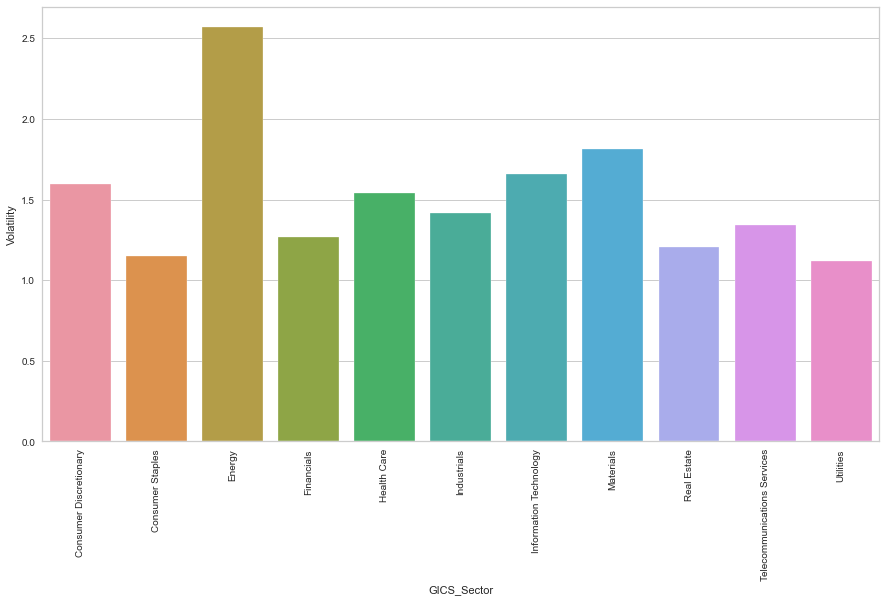

<IPython.core.display.Javascript object>

In [26]:
# Plotting a barplot of GICS_Sector vs Volatility
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Volatility", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("Volatility")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The **Energy economic sector** has the highest average volatility followed by the sectors **Materials and Information Technology**.This might imply that these sectors are more susceptible to wild fluctuation in the stock price.
* The **Utilities economic sector** have the lowest average volatility.

#####  GICS_Sector vs ROE

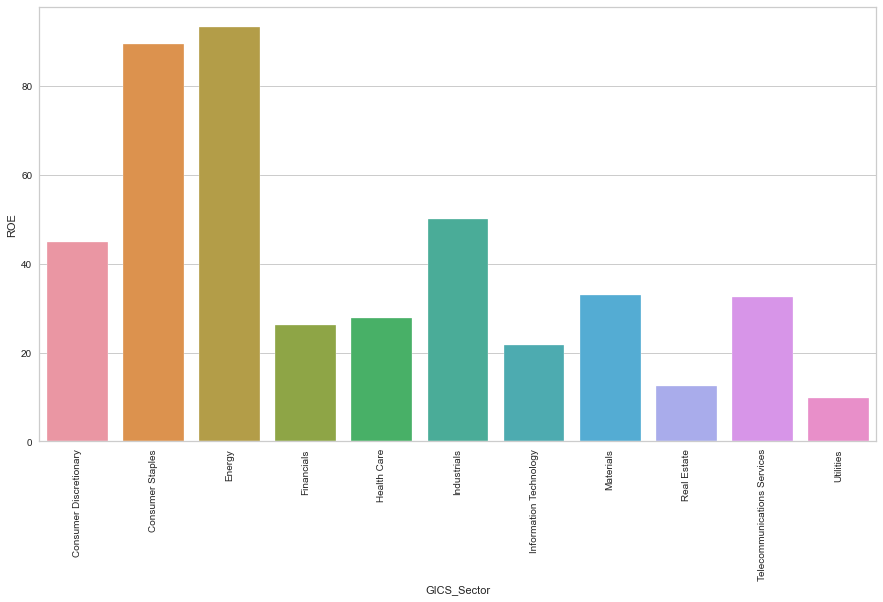

<IPython.core.display.Javascript object>

In [27]:
# Plotting a barplot of GICS_Sector vs ROE
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="ROE", ci=False)
plt.xlabel("GICS_Sector")
plt.ylabel("ROE")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The **Energy economic sector** has the highest average ROE followed by the **Consumer Staples and industrials** economic sectors.
* The **Utilities economic sector** has the lowest average ROE.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### Outlier check

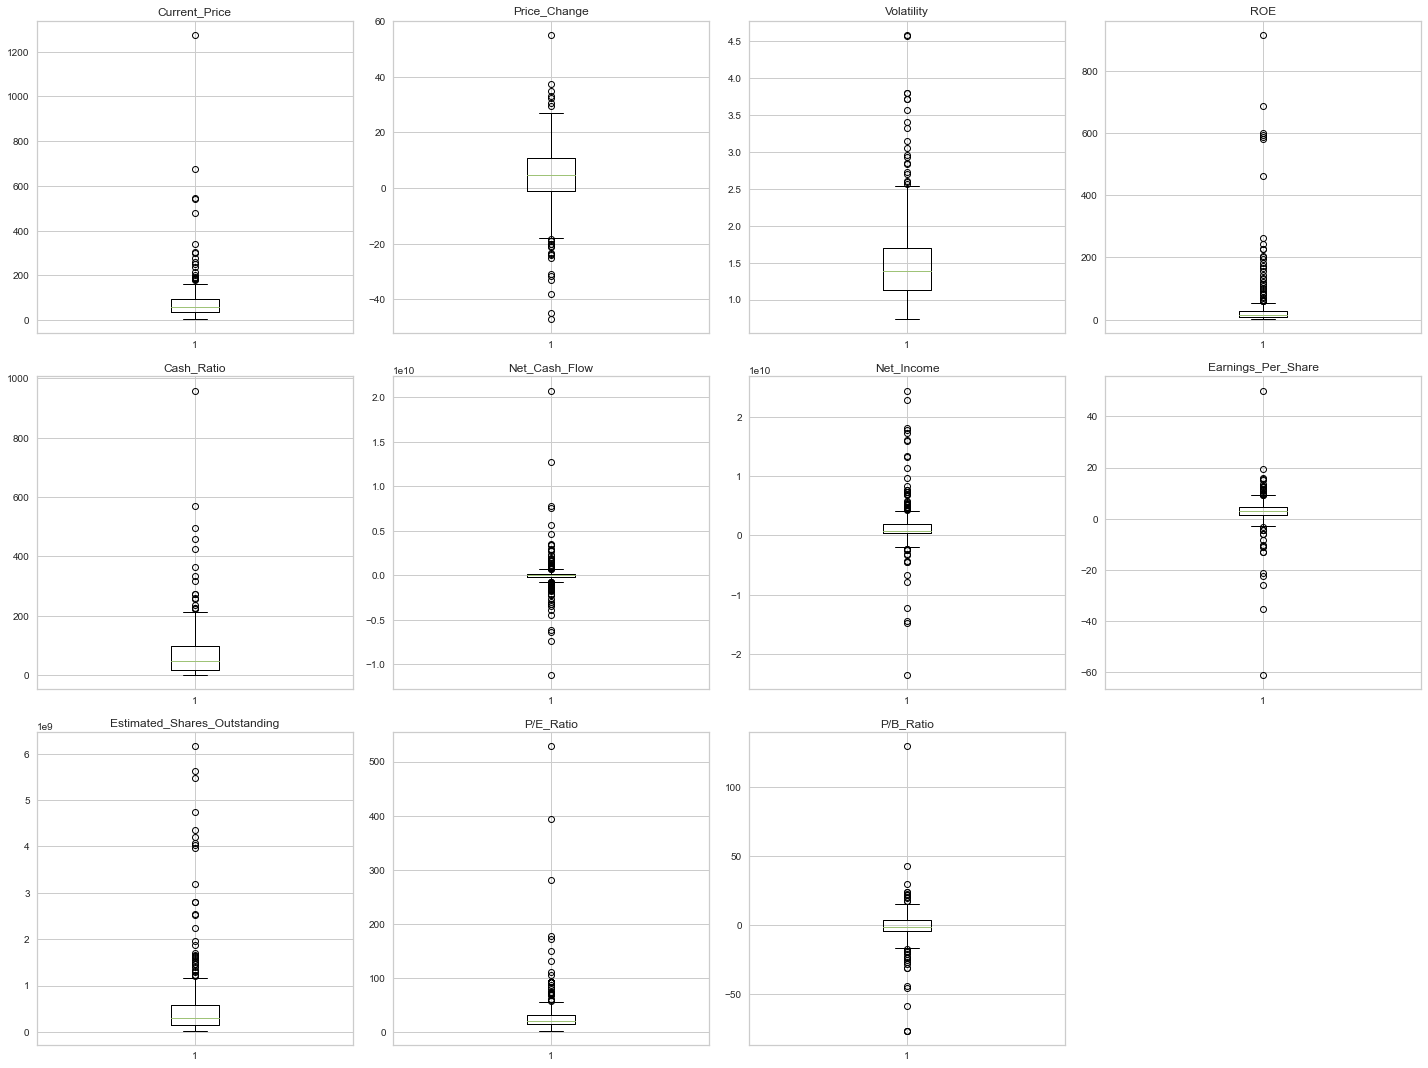

<IPython.core.display.Javascript object>

In [28]:
# Making a list of numerical columns to check for outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Plotting boxplots of numerical variables in the dataset
plt.figure(figsize=(20, 15))
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* There are outliers on all numeric variables.
* I'll leave the outliers untreated and continue the analysis with them as such as most of these outliers look quite plausible.

## EDA

- It is a good idea to explore the data once again after manipulating it.

 #### Scaling The Data

In [29]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1).copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [30]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# Viewing the first 5 rows of the scaled dataframe
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393,0.494,0.273,0.990,-0.211,-0.339,1.554,1.309,0.108,-0.652,-0.507
1,-0.221,0.355,1.137,0.938,0.077,-0.002,0.928,0.057,1.250,-0.312,-0.504
2,-0.367,0.602,-0.427,-0.193,-0.033,0.454,0.744,0.025,1.098,-0.392,0.095
3,0.134,0.826,-0.285,-0.317,1.218,-0.152,-0.220,-0.231,-0.092,0.947,0.424
4,-0.261,-0.493,0.296,-0.266,2.237,0.134,-0.203,-0.375,1.978,3.293,0.199


<IPython.core.display.Javascript object>

## K-means Clustering

In [31]:
k_means_scaled_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1824920712875775
Number of Clusters: 5 	Average Distortion: 2.1290400269803538
Number of Clusters: 6 	Average Distortion: 2.0773897408421087
Number of Clusters: 7 	Average Distortion: 2.032399441271583
Number of Clusters: 8 	Average Distortion: 1.9674759576851018
Number of Clusters: 9 	Average Distortion: 1.9261559016350198
Number of Clusters: 10 	Average Distortion: 1.8907365711457802


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

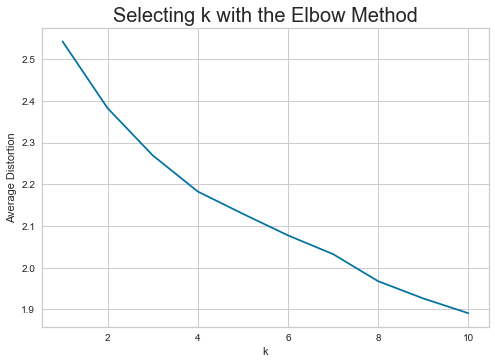

<IPython.core.display.Javascript object>

In [32]:
# Finding optimal no. of clusters
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)  # build the model
    model.fit(k_means_scaled_df)  # fit on the scaled data
    prediction = model.predict(k_means_scaled_df)  # make predictions on the data
    distortion = (
        sum(
            np.min(
                cdist(k_means_scaled_df, model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / k_means_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Observations:**
* From the elbow method,though the bend is not coming out very clearly,it seems the appropriate **value for k seems to be 4 or 5.**

**Checking the silhouette scores**

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.39901540711313915
For n_clusters = 6, silhouette score is 0.43026378658336656
For n_clusters = 7, silhouette score is 0.39983619139782584
For n_clusters = 8, silhouette score is 0.1595576603036045
For n_clusters = 9, silhouette score is 0.37764349496852784
For n_clusters = 10, silhouette score is 0.1172473664766268


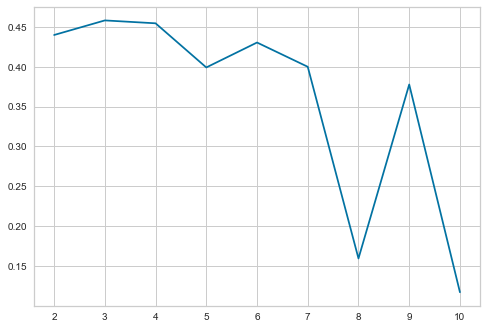

<IPython.core.display.Javascript object>

In [33]:
# Finding optimal silhouette scores
sil_score = []
cluster_list = list(range(2, 11))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((k_means_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observations:**
* From the silhouette scores,it seems that **3 is a good value for k.**

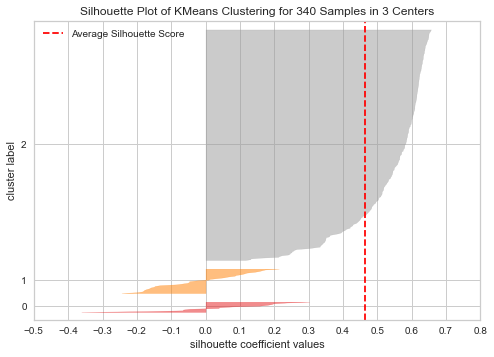

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show()

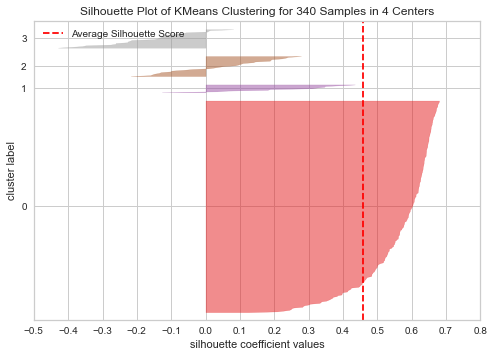

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show()

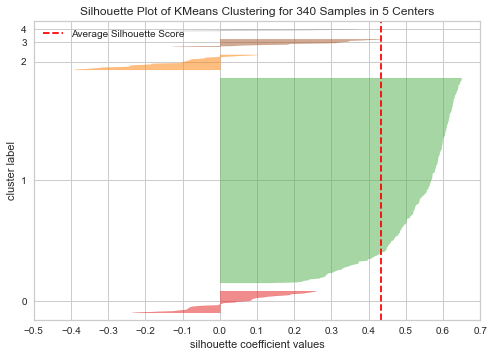

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show()

**Observations:**
* I will finally take **4 as the appropriate number of clusters** as the silhouette score is high enough and we also noticed a knick at 4 in the elbow curve.

In [37]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_scaled_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [38]:
# Creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes

df1["K_means_segments"] = kmeans.labels_
k_means_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [39]:
# Grouping the kmeans clusters by their means
km_cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [40]:
# Creating and adding a new column with the count of each cluster/group
# and grouped by the clusters labels
km_cluster_profile["count_in_each_segments"] = (
    df1.groupby("K_means_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [41]:
# Displaying cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

In [42]:
# Checking the names of the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print(
        "The",
        df1[df1["K_means_segments"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 277 companies in cluster 0 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 277
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
---------------------------------------------------------------------------------------------------- 

The 25 companies in cluster 3 are:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 25
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
-------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

In [43]:
# Checking the count of specific economic sectors in each cluster
df1.groupby(["K_means_segments", "GICS_Sector"])["Security"].count()


K_means_segments  GICS_Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Industrials                     0
                  Information Technology          1
                  

<IPython.core.display.Javascript object>

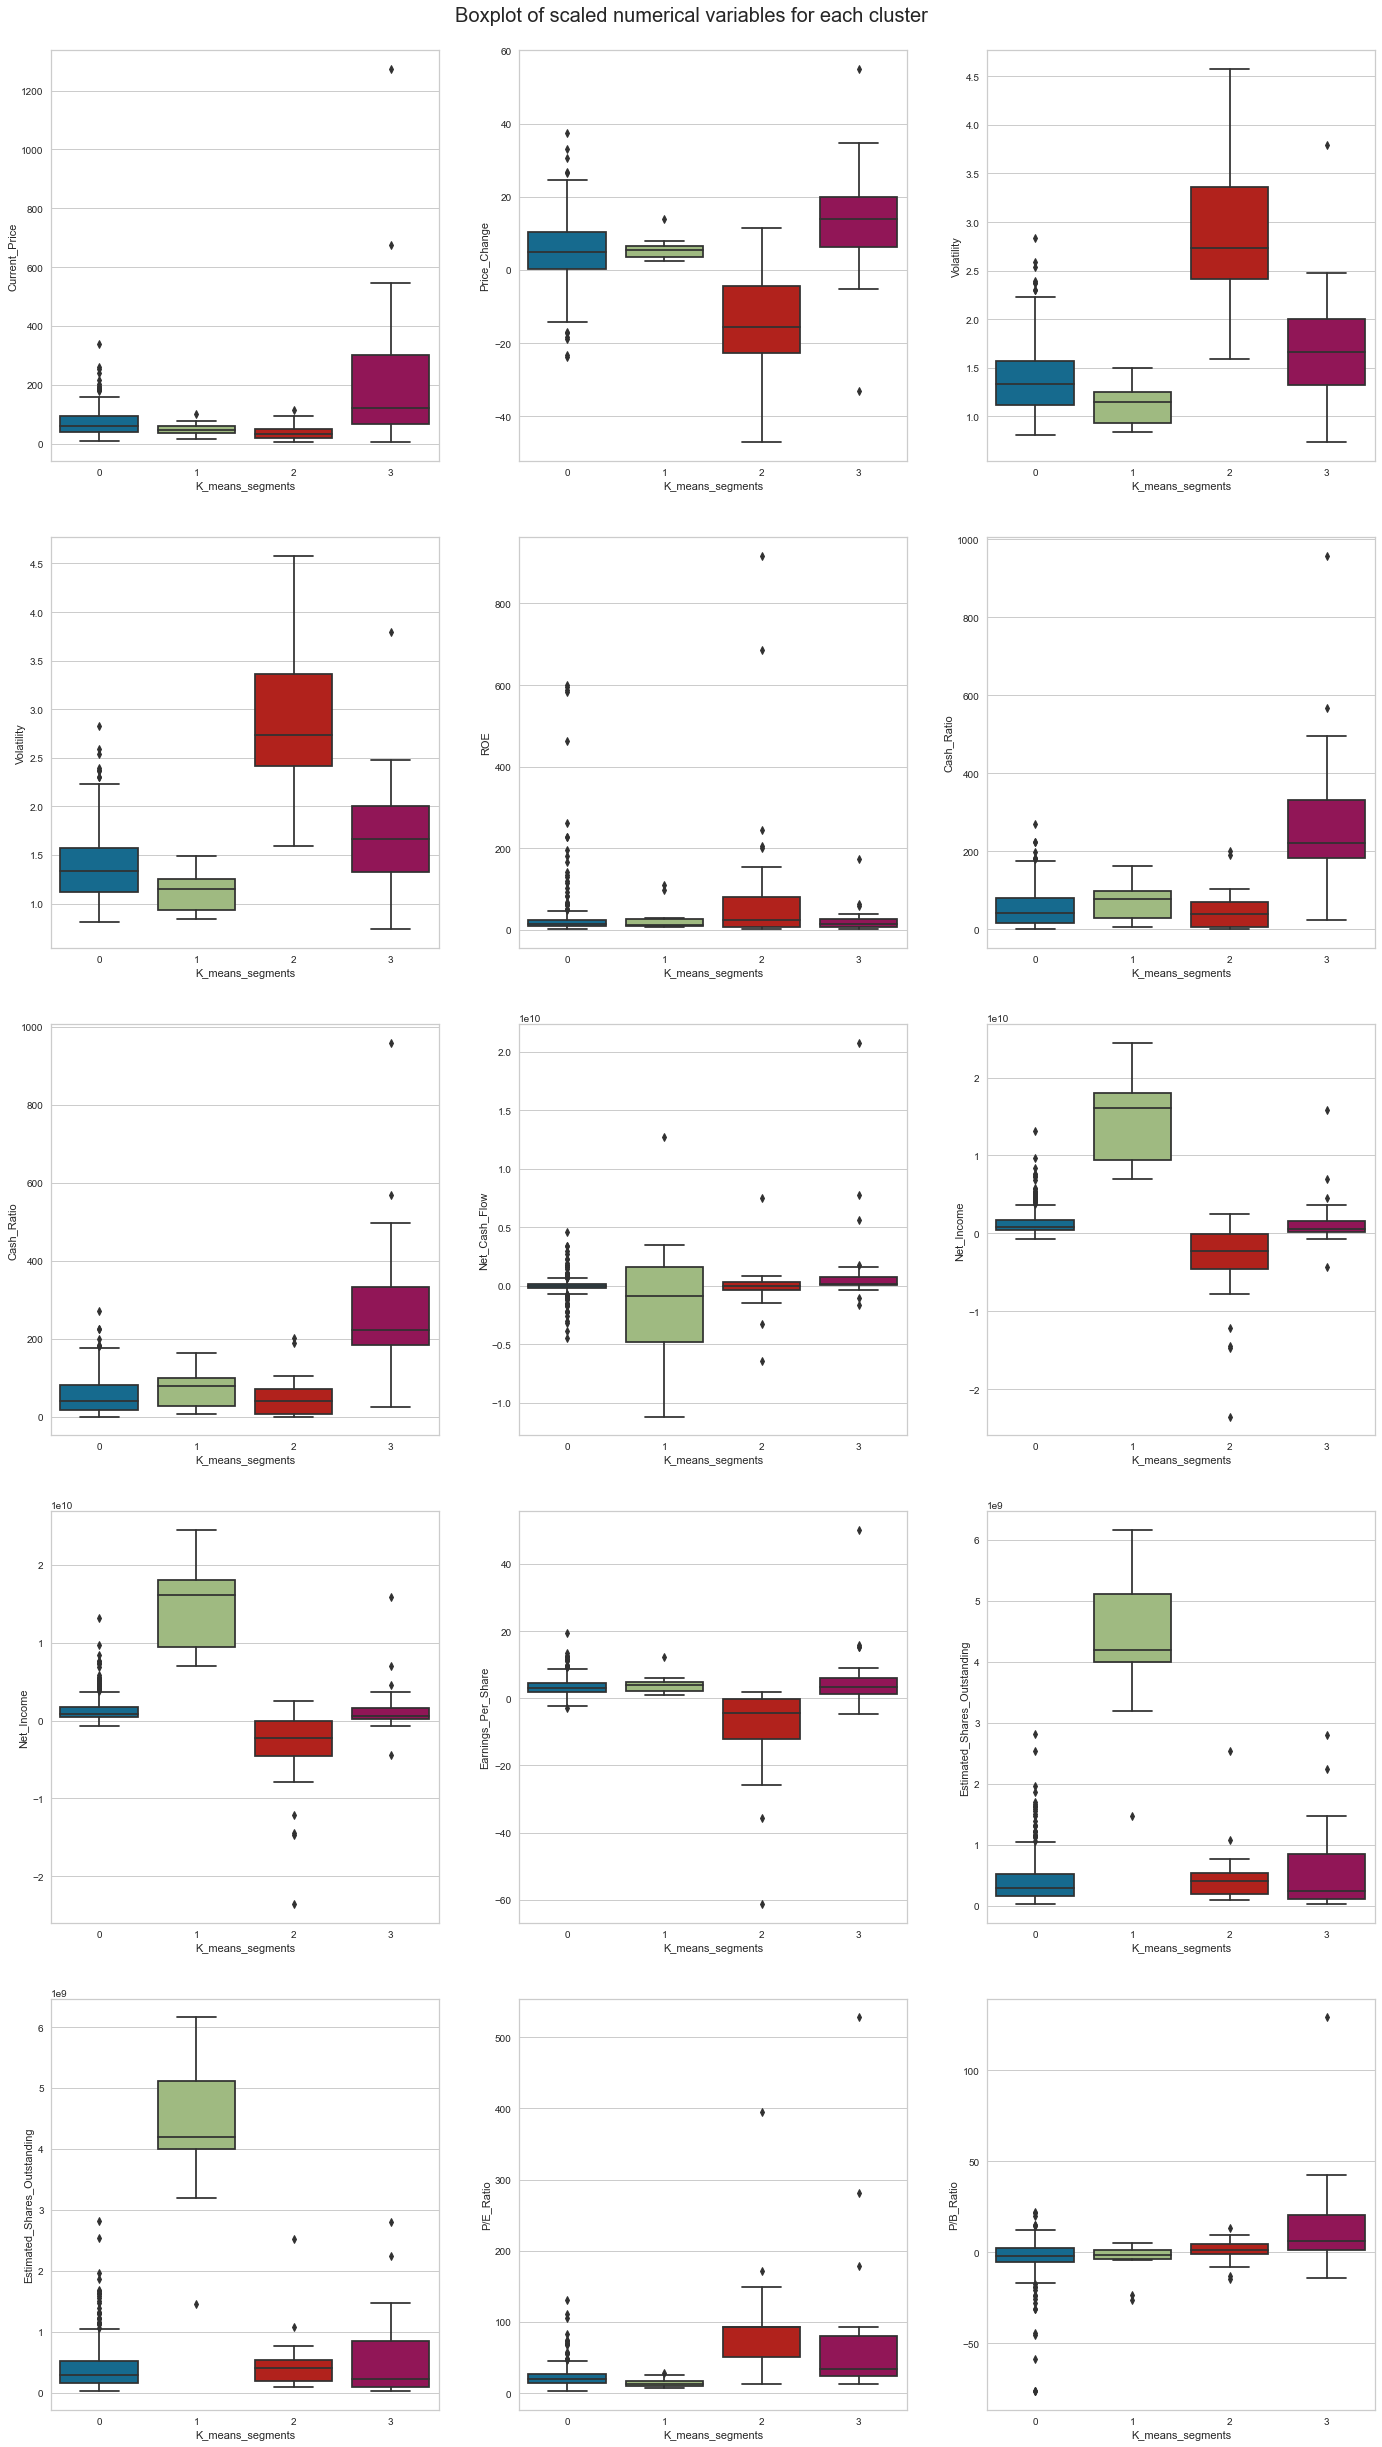

<IPython.core.display.Javascript object>

In [44]:
# Plotting boxplots of scaled numerical variables for each cluster/group
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0], y=df1[numeric_columns[counter]], x=df1["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1], y=df1[numeric_columns[counter]], x=df1["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2], y=df1[numeric_columns[counter]], x=df1["K_means_segments"],
    )


fig.tight_layout(pad=3.0)

In [45]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

**Observations:**
- **Cluster 0**
* There are **277 companies** in this cluster.
* This cluster have an average of 23.84 P/E Ratio.It has a quite low average P/E Ratio.
* The maximum stock price in this cluster is less 400dollars with a median stock  price of ~ 70dollars and an average stock price of ~73dollars .
* Volatility in this cluster ranges from ~0.5 to ~2.8 with an average of ~1.4
* Companies in this cluster have cash ratio less than 380.The average cash ratio of this cluster is 53. 
* Most companies in this cluster belong to the industrial economic sector followed by the financial economic sector.

- **Cluster 1**
 * There are **11 companies** in this cluster.
 * This cluster have a maximum stock price of less than 180dollars and an avarage stock price of ~60dollars with the lowest average volatility.
 * The average cash ratio of this cluster is ~76.
 * Most companies in this group belong to the financials economic sectors.
 
- **Cluster 2**
 * There are **27 companies** in this cluster.
 * Companies in this cluster a have stock price of less than 200dollars.This cluster has the lowest average stock price ( 38.1dollars) with the highest volatility(an average of ~3).
 * This cluster have the highest average P/E Ratio and  low average P/B Ratio(less than 2).
 * This cluster have the lowest average cash ratio(of ~50)
 * Most companies in this dataset belongs to the Energy economic sector.
 

- **Cluster 3**
 * There are **25 companies** in this cluster.
 * This cluster have an average P/E Ratio of ~75 and the highest average P/B Ratio.  
 * This cluster have the highest average stock price with an average volatility of ~1.73.
 * This cluster have the highest average cash ratio.
 * Most of the companies in this dataset belongs to the healthcare economic sector followed by the Consumer Discretionary and Information Technology economic sectors.

## Hierarchical Clustering

In [46]:
# Creating a copy of scaled data
hc_subset_scaled_df = subset_scaled_df.copy()
# Viewing the first 5 rows of dataframe
hc_subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393,0.494,0.273,0.990,-0.211,-0.339,1.554,1.309,0.108,-0.652,-0.507
1,-0.221,0.355,1.137,0.938,0.077,-0.002,0.928,0.057,1.250,-0.312,-0.504
2,-0.367,0.602,-0.427,-0.193,-0.033,0.454,0.744,0.025,1.098,-0.392,0.095
3,0.134,0.826,-0.285,-0.317,1.218,-0.152,-0.220,-0.231,-0.092,0.947,0.424
4,-0.261,-0.493,0.296,-0.266,2.237,0.134,-0.203,-0.375,1.978,3.293,0.199


<IPython.core.display.Javascript object>

In [47]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "\nHighest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524588.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlatio

<IPython.core.display.Javascript object>

**Exploring Different linkage methods with Euclidean distance only**

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "\nHighest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Observations:**
* It is seen that the cophenetic correlation is maximum with Euclidean distance and average linkage.


**Viewing the dendrograms for the different linkage methods.**

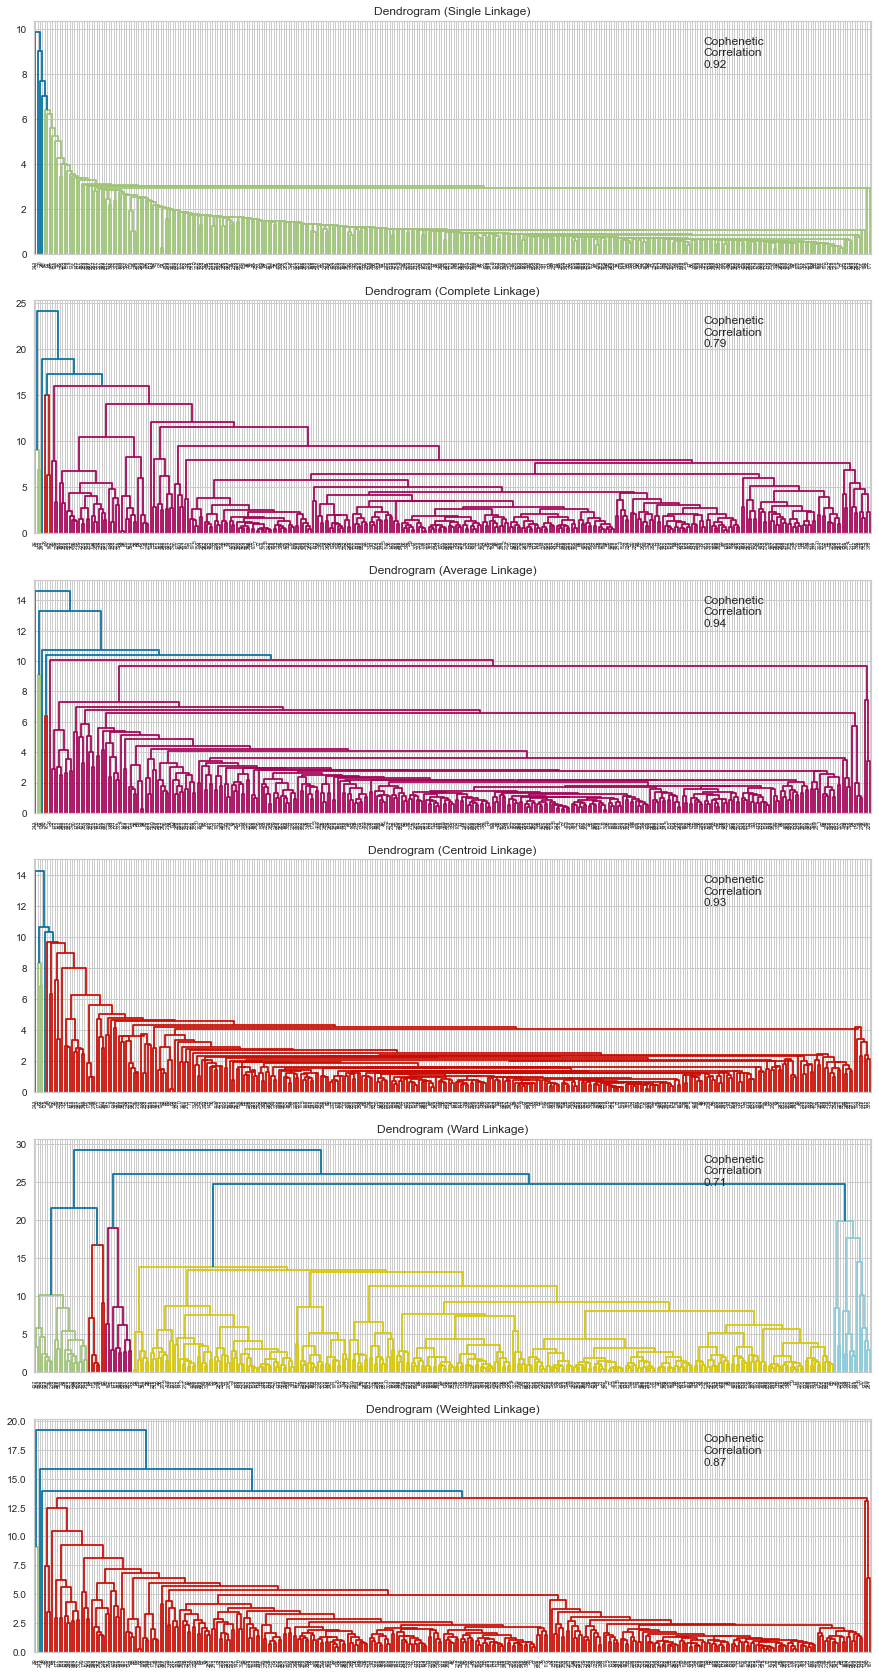

<IPython.core.display.Javascript object>

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [50]:
# Creating a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
# Sorting the cophenetic correlations in ascending order
df_cc.sort_values(by="Cophenetic Coefficient")

,Linkage,Cophenetic Coefficient
4,ward,0.710
1,complete,0.787
5,weighted,0.869
0,single,0.923
3,centroid,0.931
2,average,0.942


<IPython.core.display.Javascript object>

**Observations**
* The cophenetic correlation is highest for average and centroid linkage methods.
- Dendrogram for Ward linkage on the other hands has the lowest cophenetic correlation but it is clear that the dendrogram with Ward linkage shows quite distinct and separate clusters.
* **7 appears to be the appropriate number of clusters from the dendrogram for average linkage.**

In [51]:
# Building a Hierarchical Clustering model
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel.fit(hc_subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

<IPython.core.display.Javascript object>

In [52]:
# Creating a copy of the original data
df2 = df.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes
hc_subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [53]:
# Grouping the hierarchical clusters by their means
cluster_profile = df2.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [54]:
# Creating and adding a new column with the count of each cluster/group
# and grouped by the clusters labels
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [55]:
# let's see the names of the countries in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 330
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 5, the following companies are present:
['Alliance Data Systems']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Alexion Pharmaceuticals', 'Amazon.com Inc', 'Netflix Inc.']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 0, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']

<IPython.core.display.Javascript object>

In [56]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


<IPython.core.display.Javascript object>

**Observations:**
* From the above,it is seen that  there are 3 clusters of one company, 2 clusters of two companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.    
* Ward linkage will be tried , as it had more distinct and separated clusters (as seen from it's dendrogram before). **4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [57]:
# Building a Hierarchical Clustering model
HCmodel2 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel2.fit(hc_subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [58]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes
hc_subset_scaled_df["HC_Clusters"] = HCmodel2.labels_
df3["HC_Clusters"] = HCmodel2.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [59]:
# Grouping the hierarchical clusters by their means
cluster_profile2 = df3.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [60]:
# Grouping the hierarchical clusters by their medians
cluster2_medians = df3.groupby("HC_Clusters").median()

<IPython.core.display.Javascript object>

In [61]:
# Creating and adding a new column with the count of each cluster/group
# and grouped by the clusters labels
cluster_profile2["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [62]:
# Checking the names of the companies in each cluster
for cl in df3["HC_Clusters"].unique():
    print(
        "The",
        df3[df3["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df3[df3["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 280 companies in cluster 3 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 280
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
---------------------------------------------------------------------------------------------------- 

The 27 companies in cluster 1 are:
['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 27
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

In [63]:
# Displaying cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,35.444167,-15.846623,2.887028,119.541667,43.125000,-541139583.333333,-4489833125.000000,-10.822500,514801654.289167,83.488426,0.897531,24
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,280


<IPython.core.display.Javascript object>

**Observations:**
* The clusters formed now seem to have more variability. 

In [64]:
df3.groupby(["HC_Clusters", "GICS_Sector"])["Security"].count()

HC_Clusters  GICS_Sector                
0            Consumer Discretionary          0
             Consumer Staples                0
             Energy                         22
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          1
             Materials                       1
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
1            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          0
             Financials                      1
             Health Care                     8
             Industrials                     0
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Teleco

<IPython.core.display.Javascript object>

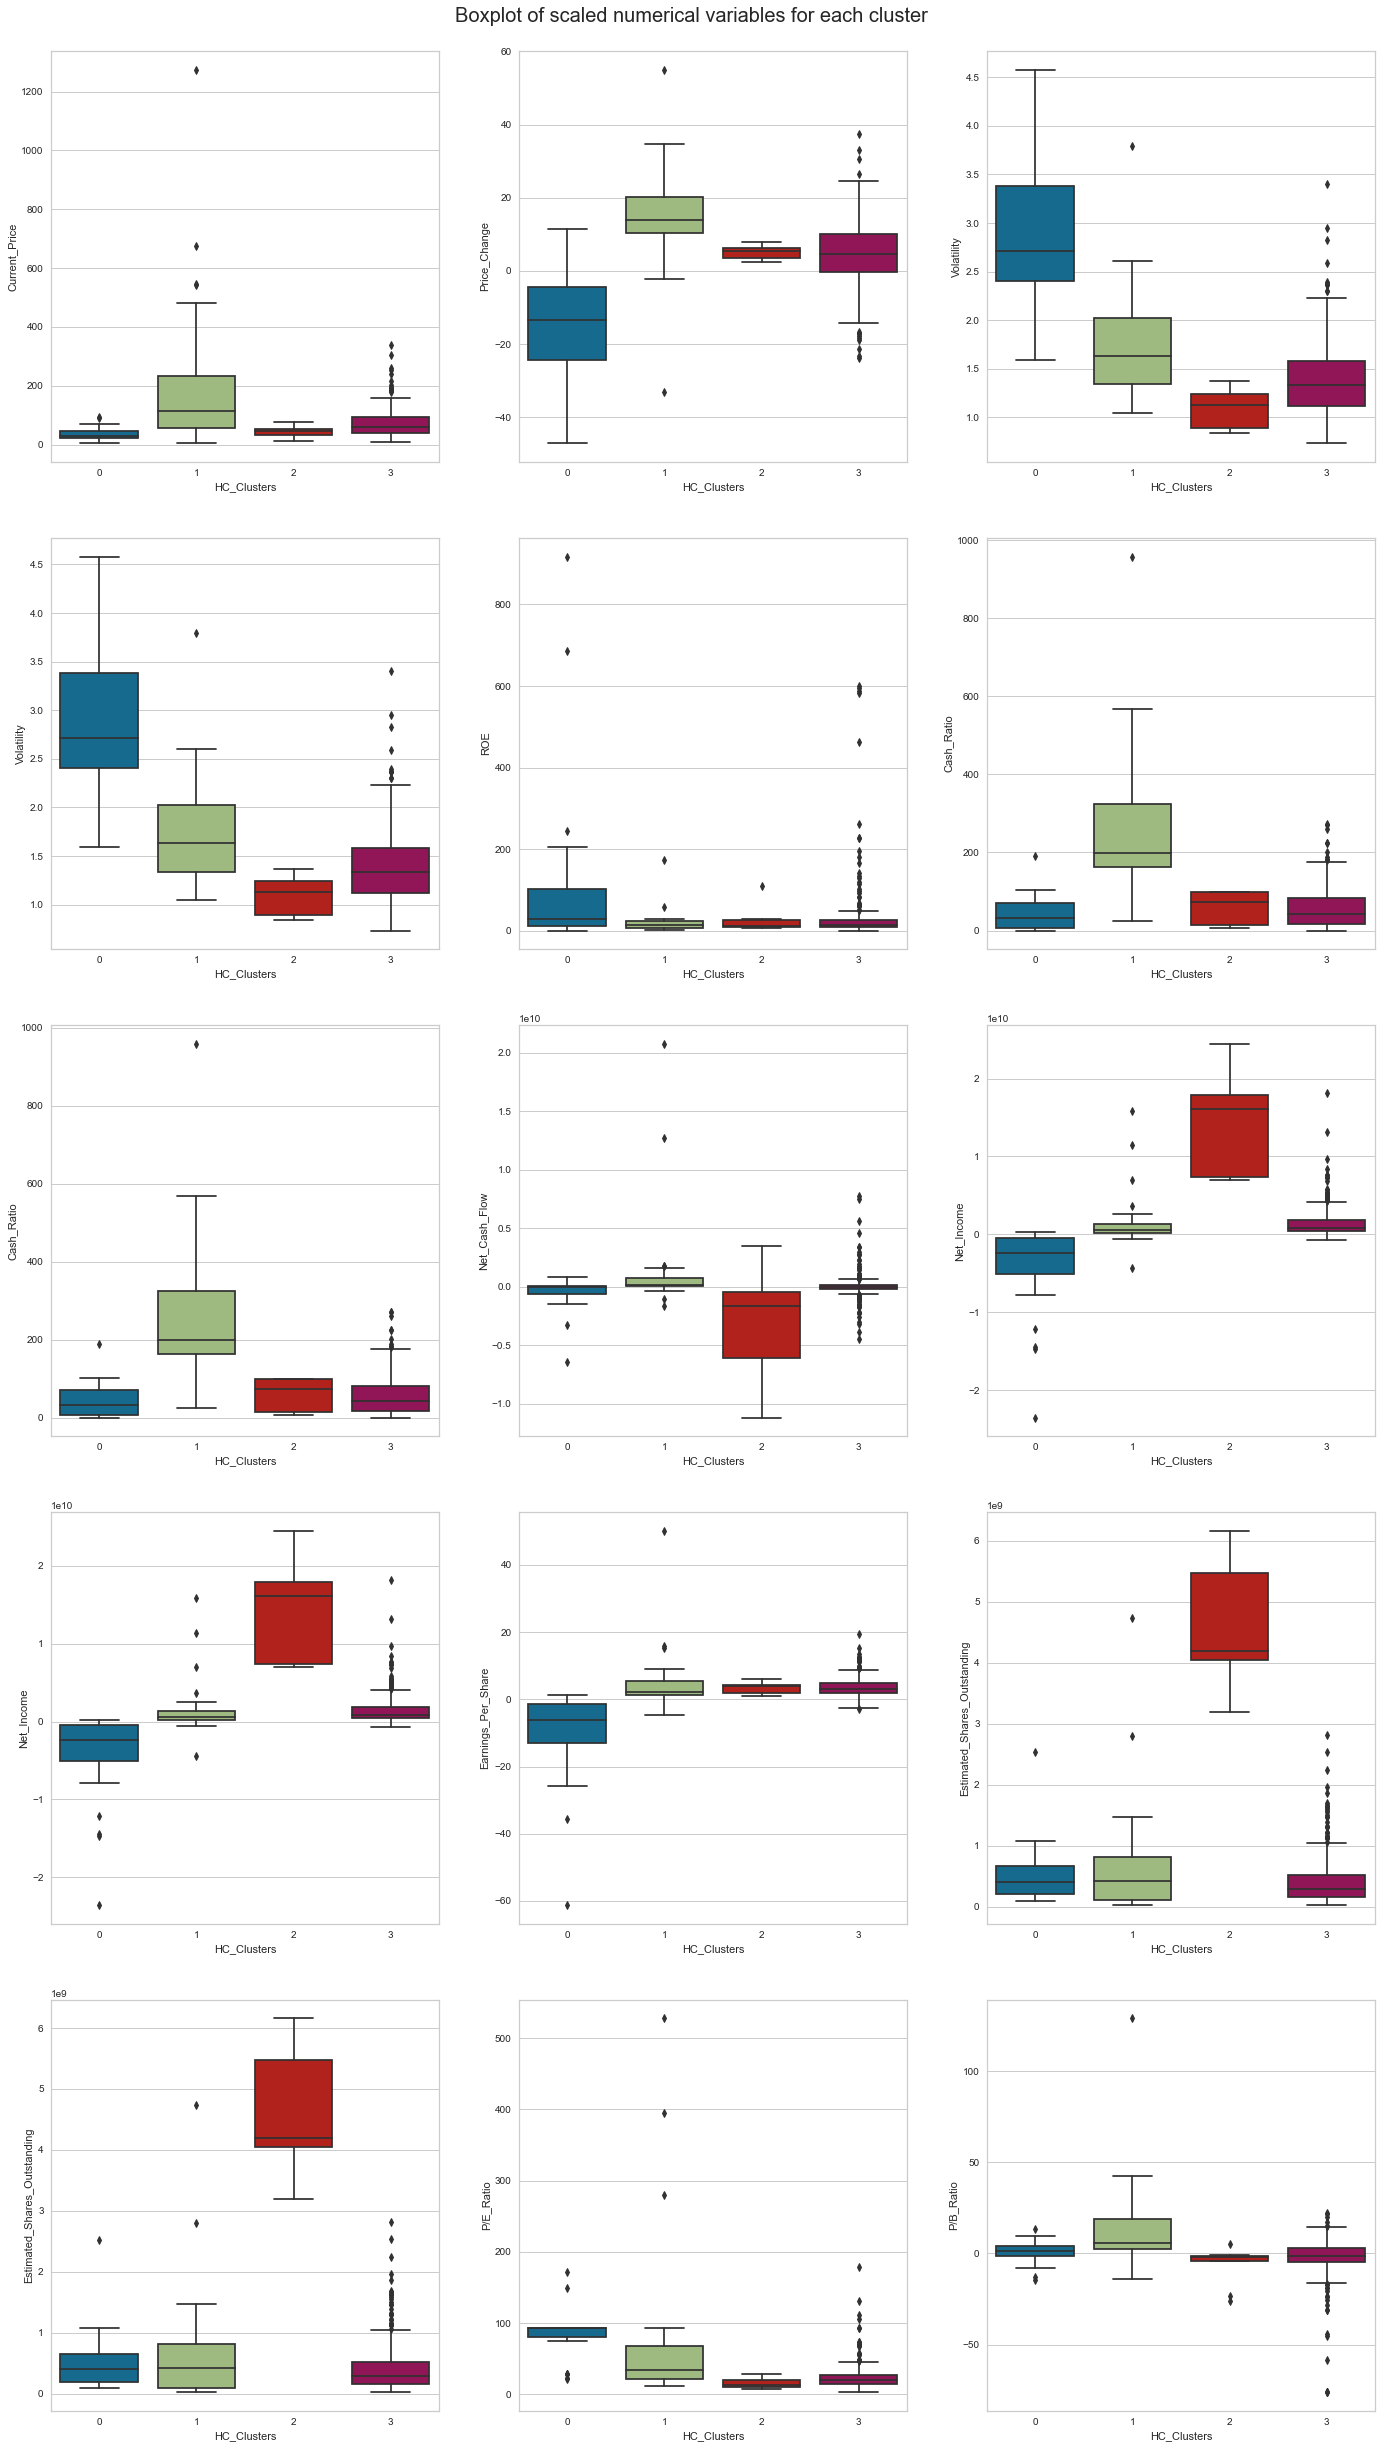

<IPython.core.display.Javascript object>

In [65]:
# Plotting boxplots of scaled numerical variables for each cluster/group
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0], y=df3[numeric_columns[counter]], x=df3["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1], y=df3[numeric_columns[counter]], x=df3["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2], y=df3[numeric_columns[counter]], x=df3["HC_Clusters"],
    )


fig.tight_layout(pad=3.0)

In [66]:
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,35.444167,-15.846623,2.887028,119.541667,43.125000,-541139583.333333,-4489833125.000000,-10.822500,514801654.289167,83.488426,0.897531,24
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,280


<IPython.core.display.Javascript object>

In [67]:
cluster2_medians.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
HC_Clusters,,,,,,,,,,,
0,29.210000,-13.481056,2.711603,29.000000,32.500000,-56575000.000000,-2339890500.000000,-6.070000,404361979.450000,93.089287,1.273530
1,114.379997,14.035095,1.630259,15.000000,198.000000,160383000.000000,546733000.000000,2.300000,422900000.000000,34.339132,5.884467
2,46.220001,5.532912,1.130337,11.000000,74.000000,-1649000000.000000,16150000000.000000,3.850000,4194805195.000000,13.004785,-1.886881
3,60.545000,4.611342,1.338095,15.000000,42.000000,2098000.000000,790650000.000000,3.040000,291516863.150000,19.256319,-1.360396


<IPython.core.display.Javascript object>

**Observations:**
- **Cluster 0**
   - There are **24 companies** in this cluster.
   - This cluster has the highest average P/E Ratio .
   - This cluster have an average  P/B Ratio of less than 50.
   - This cluster has the lowest average stock price with a high volatility(they have the highest volatility). 
   - This cluster has the lowest average and median Cash Ratio.
   - Most companies in this cluster belongs to the Energy economic sector.
- **Cluster 1**
   - There are **27 companies** in this cluster.
   - Most companies in this cluster belongs to the Information Technology economic sector followed by the Health care sector.
   - This cluster have a quite high average P/E Ratio and the highest average P/B Ratio.
   - This cluster has the highest average stock price with moderate volatility(average volatility less than 2).
   - It has the highest average and median cash ratio.
   
- **Cluster 2**
   - There are **9 companies** in this cluster.
   - A great number of companies in this cluster belong to the Financials economic sector followed by the Telecommunications Services. 
   - It has the lowest average P/E Ratio.
   - This cluster has a relatively low average stock price with the lowest average volatility.
   - Companies in this cluster have a relatively low cash ratio.
   
   
- **Cluster 3**
  - There are **280 companies** in this cluster.
  - Most companies in this cluster belongs to the Industrials economic sector. 
  - They have a moderate average stock price with a moderate average volatility.
  - They have a low average P/B_Ratio.
  - They have a  P/E Ratio less than 200
  - Companies in this cluster have cash ratio less than 400.
  

## K-means vs Hierarchical Clustering

After carrying out the different clustering techniques,the following was observed :
* K-means Clustering technique took less time to execute as compared to Hierarchical Clustering technique as lesser time was required to get distinct clusters in kmeans clustering technique.
* Both clustering techniques at the end gave distinct clusters.
* Both algorithms gave the same number of clusters that is 4.
* In K-means Clustering technique,cluster 0 had 277 observations,cluster 1 had 11 observations,cluster 2 had 27 observations and cluster 3 had 25 observations.While in Hierarchical Clustering technique,cluster 0  had 24 observations,cluster 1 had 27 observations,cluster 2 had 9 observations and cluster 3 had 280 observations.

## Actionable Insights and Recommendations

- **Actionable Insights:**

**In K-means Clustering Algorithm,the following clusters profile were formed:**

- **Cluster 0**
* There are **277 companies** in this cluster.
* This cluster have an average of 23.84 P/E Ratio.It has a quite low average P/E Ratio.
* The maximum stock price in this cluster is less 400dollars with a median stock  price of ~ 70dollars and an average stock price of ~73dollars .
* Volatility in this cluster ranges from ~0.5 to ~2.8 with an average of ~1.4
* Companies in this cluster have cash ratio less than 380.The average cash ratio of this cluster is 53. 
* Most companies in this cluster belong to the industrial economic sector followed by the financial economic sector.

- **Cluster 1**
 * There are **11 companies** in this cluster.
 * This cluster have a maximum stock price of less than 180dollars and an avarage stock price of ~60dollars with the lowest average volatility.
 * The average cash ratio of this cluster is ~76.
 * Most companies in this group belong to the financials economic sectors.
 
- **Cluster 2**
 * There are **27 companies** in this cluster.
 * Companies in this cluster a have stock price of less than 200dollars.This cluster has the lowest average stock price ( 38.1dollars) with the highest volatility(an average of ~3).
 * This cluster have the highest average P/E Ratio and  low average P/B Ratio(less than 2).
 * This cluster have the lowest average cash ratio(of ~50)
 * Most companies in this dataset belongs to the Energy economic sector.
 

- **Cluster 3**
 * There are **25 companies** in this cluster.
 * This cluster have an average P/E Ratio of ~75 and the highest average P/B Ratio.  
 * This cluster have the highest average stock price with an average volatility of ~1.73.
 * This cluster have the highest average cash ratio.
 * Most of the companies in this dataset belongs to the healthcare economic sector followed by the Consumer Discretionary and Information Technology economic sectors.
 
**In Hierarchical Clustering technique,the following clusters profiles were formed:**

- **Cluster 0**
   - There are **24 companies** in this cluster.
   - This cluster has the highest average P/E Ratio .
   - This cluster have an average  P/B Ratio of less than 50.
   - This cluster has the lowest average stock price with a high volatility(they have the highest volatility). 
   - This cluster has the lowest average and median Cash Ratio.
   - Most companies in this cluster belongs to the Energy economic sector.
- **Cluster 1**
   - There are **27 companies** in this cluster.
   - Most companies in this cluster belongs to the Information Technology economic sector followed by the Health care sector.
   - This cluster have a quite high average P/E Ratio and the highest average P/B Ratio.
   - This cluster has the highest average stock price with moderate volatility(average volatility less than 2).
   - It has the highest average and median cash ratio.
   
- **Cluster 2**
   - There are **9 companies** in this cluster.
   - A great number of companies in this cluster belong to the Financials economic sector followed by the Telecommunications Services. 
   - It has the lowest average P/E Ratio.
   - This cluster has a relatively low average stock price with the lowest average volatility.
   - Companies in this cluster have a relatively low cash ratio.
 
- **Cluster 3**
   - There are **280 companies** in this cluster.
   - Most companies in this cluster belongs to the Industrials economic sector. 
   - They have a moderate average stock price with a moderate average  volatility.
   - They have a low average P/B_Ratio.
   - They have a  P/E Ratio less than 200
   - Companies in this cluster have cash ratio less than 400.
  


- **Recommendations:**
Based on cluster profile above done by the K-means Clustering Algorithm,

* **Cluster 2** consists of companies with very low stock price and a high volatility and a very high P/E Ratio and a very low cash ratio.
* **Cluster 3** consist of companies with a very high stock price and quite low volatility and a very high cash ratio and a quite high P/E Ratio.

* **Trade&Ahead firm** should handed over the above clusters profiles above with their given financial  metrics  to financial experts so they can come out with strategique insights for investments  inorder to help investors have a better view as to where to invest across different market segments and avoid vulnerable risks and losses. 